# Projekt Klasyfikacji: Global AI Job Market & Salary Trends 2025

## Opis danych i motywacja

W projekcie wykorzystuję zbiór danych „Global AI Job Market & Salary Trends 2025", obejmujący ponad 15 000 ofert pracy z branży sztucznej inteligencji, zebranych w latach 2024–2025 z największych platform (m.in. LinkedIn, Indeed, Glassdoor) przy pomocy webscrapingu. Dane obejmują szczegółowe informacje o stanowiskach, wynagrodzeniach, wymaganych umiejętnościach, poziomie doświadczenia, trybie pracy (stacjonarna/zdalna/hybrydowa), wielkości firmy i lokalizacji. 

Wybrałem ten zbiór, ponieważ pozwala analizować aktualne trendy na globalnym rynku pracy AI, a także budować modele klasyfikacyjne przydatne do automatycznej analizy ofert – co jest wartościowe zarówno dla kandydatów, jak i rekruterów.


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from IPython.display import display
import warnings
warnings.filterwarnings('ignore')

plt.style.use('default')
sns.set_palette("Set2")


In [100]:
df = pd.read_csv('ai_job_dataset.csv')

print("Kształt danych:", df.shape)
print("\nKolumny:", df.columns.tolist())
print("\nTypy danych:")
print(df.dtypes)


Kształt danych: (15000, 19)

Kolumny: ['job_id', 'job_title', 'salary_usd', 'salary_currency', 'experience_level', 'employment_type', 'company_location', 'company_size', 'employee_residence', 'remote_ratio', 'required_skills', 'education_required', 'years_experience', 'industry', 'posting_date', 'application_deadline', 'job_description_length', 'benefits_score', 'company_name']

Typy danych:
job_id                     object
job_title                  object
salary_usd                  int64
salary_currency            object
experience_level           object
employment_type            object
company_location           object
company_size               object
employee_residence         object
remote_ratio                int64
required_skills            object
education_required         object
years_experience            int64
industry                   object
posting_date               object
application_deadline       object
job_description_length      int64
benefits_score            f

## Eksploracyjna Analiza Danych (EDA)


In [101]:
df.head(10)


,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
0,AI00001,AI Research Scientist,90376,USD,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,2024-10-18,2024-11-07,1076,5.9,Smart Analytics
1,AI00002,AI Software Engineer,61895,USD,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,2024-11-20,2025-01-11,1268,5.2,TechCorp Inc
2,AI00003,AI Specialist,152626,USD,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,2025-03-18,2025-04-07,1974,9.4,Autonomous Tech
3,AI00004,NLP Engineer,80215,USD,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,2024-12-23,2025-02-24,1345,8.6,Future Systems
4,AI00005,AI Consultant,54624,EUR,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,2025-04-15,2025-06-23,1989,6.6,Advanced Robotics
5,AI00006,AI Architect,123574,EUR,SE,CT,Germany,M,Germany,50,"Data Visualization, R, SQL, Linux",Associate,7,Healthcare,2024-08-31,2024-10-04,819,5.9,Neural Networks Co
6,AI00007,Principal Data Scientist,79670,GBP,MI,FL,United Kingdom,S,United Kingdom,0,"R, Docker, MLOps",Associate,3,Gaming,2024-12-29,2025-02-28,1936,6.3,DataVision Ltd
7,AI00008,NLP Engineer,70640,EUR,EN,FL,France,L,France,0,"Python, SQL, Computer Vision, Java, Azure",Master,0,Healthcare,2024-06-07,2024-07-01,1286,7.6,Cloud AI Solutions
8,AI00009,Data Analyst,160710,USD,SE,CT,Singapore,L,Singapore,0,"Hadoop, Git, Mathematics, Python",PhD,7,Government,2024-11-04,2024-11-24,551,9.3,Quantum Computing Inc
9,AI00010,AI Software Engineer,102557,USD,SE,PT,Austria,M,Austria,0,"MLOps, GCP, Scala, Azure, Linux",Master,5,Government,2024-10-20,2024-11-06,2340,5.8,Cloud AI Solutions


In [102]:
df.info()

print("\nPodsumowanie statystyczne:")
display(df.describe(include='all'))

print("\nSprawdzenie braków danych:")
missing_data = df.isnull().sum()
print(missing_data[missing_data > 0])  #Pokaż tylko kolumny z brakami

if missing_data.sum() == 0:
    print("Brak brakujących wartośc")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   job_id                  15000 non-null  object 
 1   job_title               15000 non-null  object 
 2   salary_usd              15000 non-null  int64  
 3   salary_currency         15000 non-null  object 
 4   experience_level        15000 non-null  object 
 5   employment_type         15000 non-null  object 
 6   company_location        15000 non-null  object 
 7   company_size            15000 non-null  object 
 8   employee_residence      15000 non-null  object 
 9   remote_ratio            15000 non-null  int64  
 10  required_skills         15000 non-null  object 
 11  education_required      15000 non-null  object 
 12  years_experience        15000 non-null  int64  
 13  industry                15000 non-null  object 
 14  posting_date            15000 non-null

,job_id,job_title,salary_usd,salary_currency,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,posting_date,application_deadline,job_description_length,benefits_score,company_name
count,15000,15000,15000.000000,15000,15000,15000,15000,15000,15000,15000.000000,15000,15000,15000.000000,15000,15000,15000,15000.000000,15000.000000,15000
unique,15000,20,NaN,3,4,4,20,3,20,NaN,13663,4,NaN,15,486,543,NaN,NaN,16
top,AI00001,Machine Learning Researcher,NaN,USD,MI,FT,Germany,S,Sweden,NaN,"Python, TensorFlow, PyTorch",Bachelor,NaN,Retail,2024-07-05,2025-01-05,NaN,NaN,TechCorp Inc
freq,1,808,NaN,11957,3781,3812,814,5007,790,NaN,17,3789,NaN,1063,51,47,NaN,NaN,980
mean,NaN,NaN,115348.965133,NaN,NaN,NaN,NaN,NaN,NaN,49.483333,NaN,NaN,6.253200,NaN,NaN,NaN,1503.314733,7.504273,NaN
std,NaN,NaN,60260.940438,NaN,NaN,NaN,NaN,NaN,NaN,40.812712,NaN,NaN,5.545768,NaN,NaN,NaN,576.127083,1.450870,NaN
min,NaN,NaN,32519.000000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,500.000000,5.000000,NaN
25%,NaN,NaN,70179.750000,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,2.000000,NaN,NaN,NaN,1003.750000,6.200000,NaN
50%,NaN,NaN,99705.000000,NaN,NaN,NaN,NaN,NaN,NaN,50.000000,NaN,NaN,5.000000,NaN,NaN,NaN,1512.000000,7.500000,NaN
75%,NaN,NaN,146408.500000,NaN,NaN,NaN,NaN,NaN,NaN,100.000000,NaN,NaN,10.000000,NaN,NaN,NaN,2000.000000,8.800000,NaN



Sprawdzenie braków danych:
Series([], dtype: int64)
Brak brakujących wartośc


In [103]:
#Sprawdzenie unikalnych wartości w kluczowych kolumnach
print("Unikalne wartości w kluczowych kolumnach:")
for col in ['experience_level', 'employment_type', 'company_size', 'remote_ratio']:
    print(f"\n{col}: {df[col].unique()}")


Unikalne wartości w kluczowych kolumnach:

experience_level: ['SE' 'EN' 'MI' 'EX']

employment_type: ['CT' 'FL' 'PT' 'FT']

company_size: ['M' 'L' 'S']

remote_ratio: [ 50 100   0]


In [104]:
#Mapowanie skrótów na pełne nazwy
level_mapping = {
    'EN': 'Entry',
    'MI': 'Mid', 
    'SE': 'Senior',
    'EX': 'Executive'
}
df['experience_level_full'] = df['experience_level'].map(level_mapping)

employment_type_mapping = {
    'FT': 'Full-time',
    'PT': 'Part-time',
    'CT': 'Contract', 
    'FL': 'Freelance'
}
df['employment_type_full'] = df['employment_type'].map(employment_type_mapping)

#brak zmiany w company_size, ponieważ S - M - L wydaje się całekim logiczne

In [105]:
#Usunięcie niepotrzebnych kolumn
columns_to_drop = ['job_id', 'posting_date', 'application_deadline',  'salary_currency']
df_cleaned = df.drop(columns=columns_to_drop)
print(f"Usunięto kolumny: {columns_to_drop}")
print(f"Pozostało kolumn: {len(df_cleaned.columns)}")

#salary_currency - niepotrzebne skoro jest juz salary_usd
#application_deadline - nieistotny 
#posting_date - nieistotne
#job_id - nic nie wnosi 

Usunięto kolumny: ['job_id', 'posting_date', 'application_deadline', 'salary_currency']
Pozostało kolumn: 17


In [106]:
df_cleaned.head()

,job_title,salary_usd,experience_level,employment_type,company_location,company_size,employee_residence,remote_ratio,required_skills,education_required,years_experience,industry,job_description_length,benefits_score,company_name,experience_level_full,employment_type_full
0,AI Research Scientist,90376,SE,CT,China,M,China,50,"Tableau, PyTorch, Kubernetes, Linux, NLP",Bachelor,9,Automotive,1076,5.9,Smart Analytics,Senior,Contract
1,AI Software Engineer,61895,EN,CT,Canada,M,Ireland,100,"Deep Learning, AWS, Mathematics, Python, Docker",Master,1,Media,1268,5.2,TechCorp Inc,Entry,Contract
2,AI Specialist,152626,MI,FL,Switzerland,L,South Korea,0,"Kubernetes, Deep Learning, Java, Hadoop, NLP",Associate,2,Education,1974,9.4,Autonomous Tech,Mid,Freelance
3,NLP Engineer,80215,SE,FL,India,M,India,50,"Scala, SQL, Linux, Python",PhD,7,Consulting,1345,8.6,Future Systems,Senior,Freelance
4,AI Consultant,54624,EN,PT,France,S,Singapore,100,"MLOps, Java, Tableau, Python",Master,0,Media,1989,6.6,Advanced Robotics,Entry,Part-time


In [107]:
#Rozkład doświadczenia/rodzaju zatrudnienia/stanowisk w ofertach pracy
print("Rozkład poziomów doświadczenia:")
display(df_cleaned['experience_level_full'].value_counts().to_frame('count'))

print("\nRozkład typów zatrudnienia:")
display(df_cleaned['employment_type_full'].value_counts().to_frame('count'))

print("\nTop 10 najczęstszych stanowisk:")
display(df_cleaned['job_title'].value_counts().head(10).to_frame('count'))


Rozkład poziomów doświadczenia:


,count
experience_level_full,
Mid,3781
Executive,3760
Senior,3741
Entry,3718



Rozkład typów zatrudnienia:


,count
employment_type_full,
Full-time,3812
Freelance,3758
Contract,3721
Part-time,3709



Top 10 najczęstszych stanowisk:


,count
job_title,
Machine Learning Researcher,808
AI Software Engineer,784
Autonomous Systems Engineer,777
Machine Learning Engineer,772
AI Architect,771
Head of AI,765
NLP Engineer,762
Robotics Engineer,759
Data Analyst,759


### Wizualizacje rozkładów zmiennych liczbowych


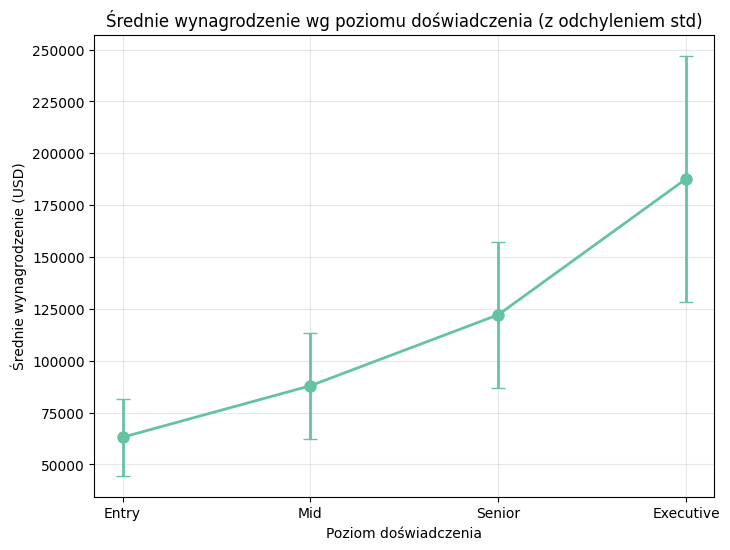

In [108]:
# Obliczenie średnich i odchyleń standardowych
stats = df_cleaned.groupby('experience_level_full')['salary_usd'].agg(['mean', 'std']).reindex(order)

plt.figure(figsize=(8, 6))
plt.errorbar(order, stats['mean'], yerr=stats['std'], 
             marker='o', linewidth=2, markersize=8, capsize=5)
plt.title('Średnie wynagrodzenie wg poziomu doświadczenia (z odchyleniem std)')
plt.xlabel('Poziom doświadczenia')
plt.ylabel('Średnie wynagrodzenie (USD)')
plt.grid(True, alpha=0.3)
plt.show()


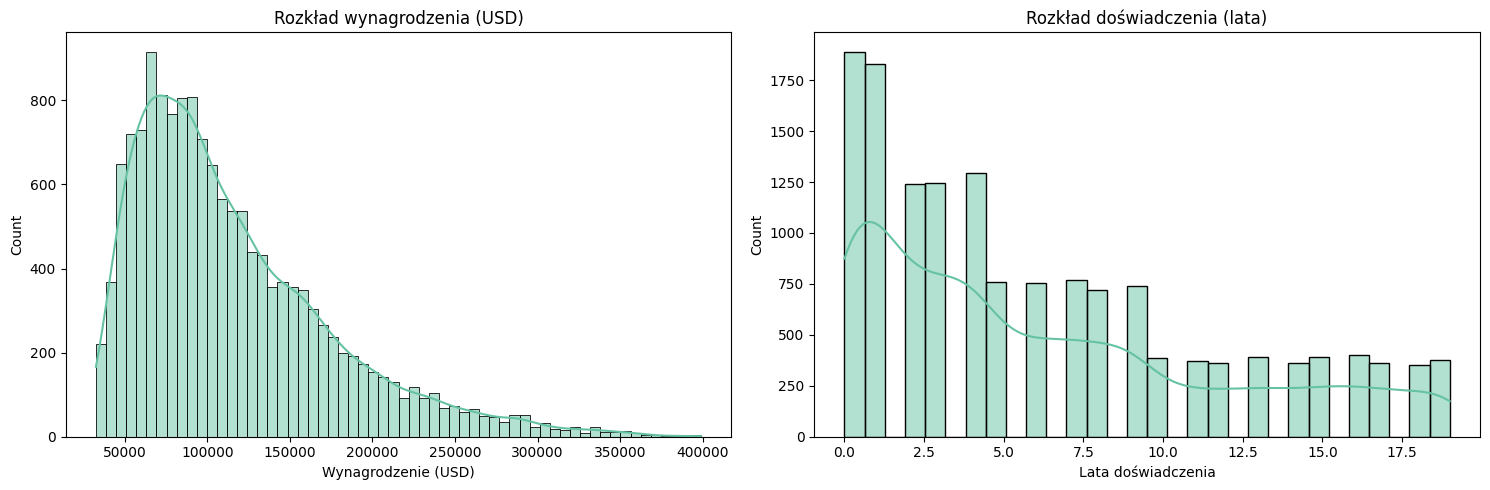

In [109]:
#Rozkład wynagrodzenia i lat doświadczenia
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

#Histogram wynagrodzenia
sns.histplot(df_cleaned['salary_usd'], kde=True, ax=axes[0])
axes[0].set_title('Rozkład wynagrodzenia (USD)')
axes[0].set_xlabel('Wynagrodzenie (USD)')

#Histogram lat doświadczenia
sns.histplot(df_cleaned['years_experience'], kde=True, ax=axes[1])
axes[1].set_title('Rozkład doświadczenia (lata)')
axes[1].set_xlabel('Lata doświadczenia')

plt.tight_layout()
plt.show()


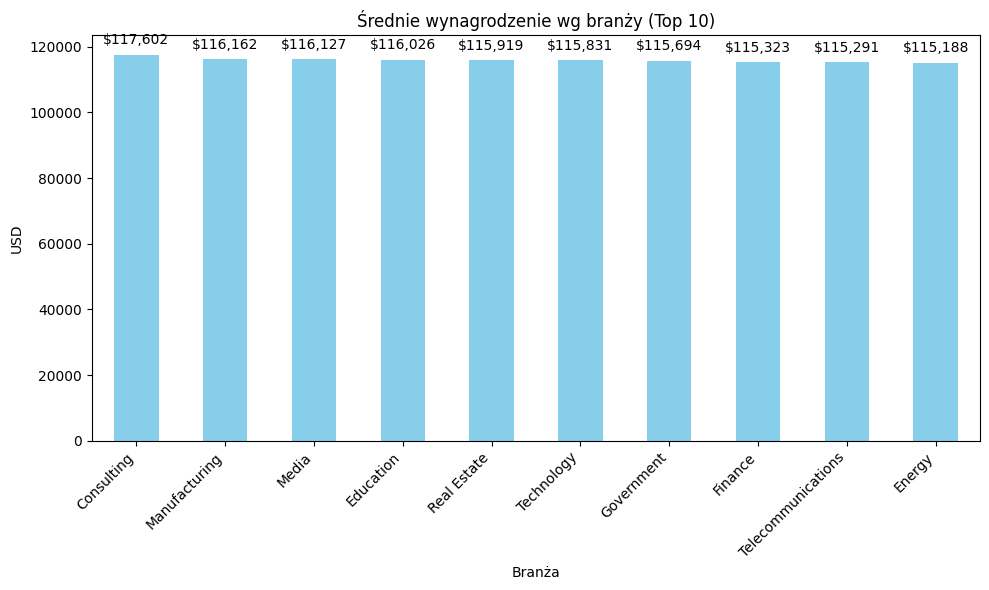

In [110]:
#Średnie wynagrodzenie wg branży (top 10)
mean_salary = df_cleaned.groupby('industry')['salary_usd'].mean().sort_values(ascending=False).head(10)

plt.figure(figsize=(10, 6))
ax = mean_salary.plot(kind='bar', color='skyblue')
plt.title('Średnie wynagrodzenie wg branży (Top 10)')
plt.ylabel('USD')
plt.xlabel('Branża')
plt.xticks(rotation=45, ha='right')

# Dodanie wartości nad słupkami
for i, value in enumerate(mean_salary):
    plt.text(i, value * 1.02, f"${int(value):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


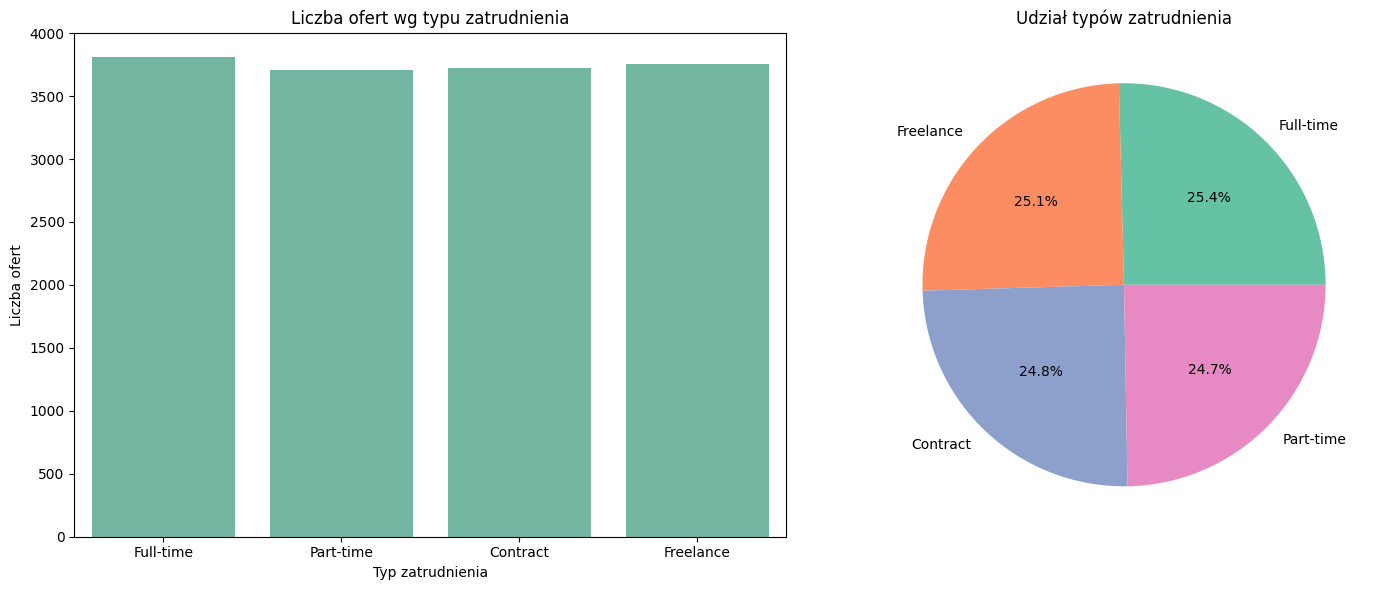

In [111]:
#Liczba ofert wg typu zatrudnienia
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Wykres słupkowy
sns.countplot(x='employment_type_full', data=df_cleaned, 
             order=['Full-time', 'Part-time', 'Contract', 'Freelance'], ax=axes[0])
axes[0].set_title('Liczba ofert wg typu zatrudnienia')
axes[0].set_xlabel('Typ zatrudnienia')
axes[0].set_ylabel('Liczba ofert')

# Wykres kołowy
df['employment_type_full'].value_counts().plot(kind='pie', autopct='%1.1f%%', ax=axes[1])
axes[1].set_title('Udział typów zatrudnienia')
axes[1].set_ylabel('')

plt.tight_layout()
plt.show()


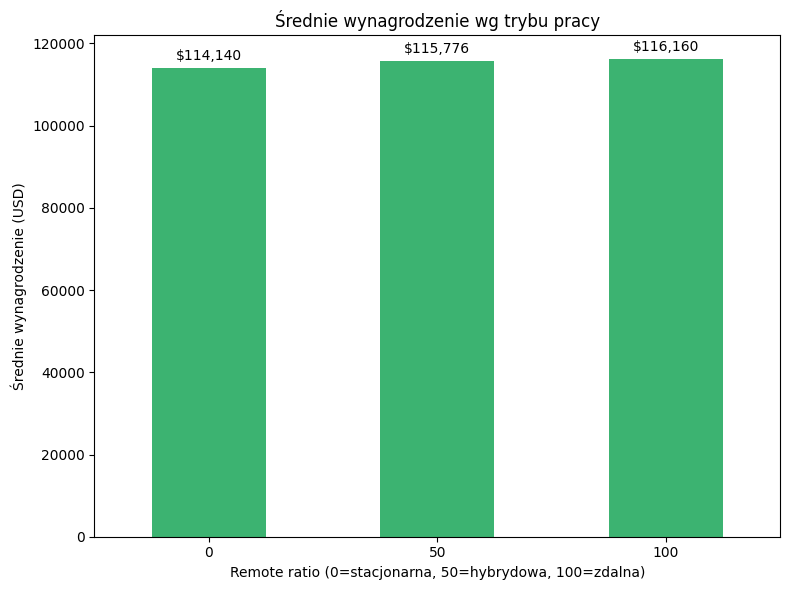

In [112]:
# Średnie wynagrodzenie wg trybu pracy
mean_salary_remote = df_cleaned.groupby('remote_ratio')['salary_usd'].mean().sort_index()

plt.figure(figsize=(8, 6))
mean_salary_remote.plot(kind='bar', color='mediumseagreen')
plt.title('Średnie wynagrodzenie wg trybu pracy')
plt.xlabel('Remote ratio (0=stacjonarna, 50=hybrydowa, 100=zdalna)')
plt.ylabel('Średnie wynagrodzenie (USD)')
plt.xticks(rotation=0)

# Dodanie wartości nad słupkami
for i, value in enumerate(mean_salary_remote):
    plt.text(i, value * 1.01, f"${int(value):,}", ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


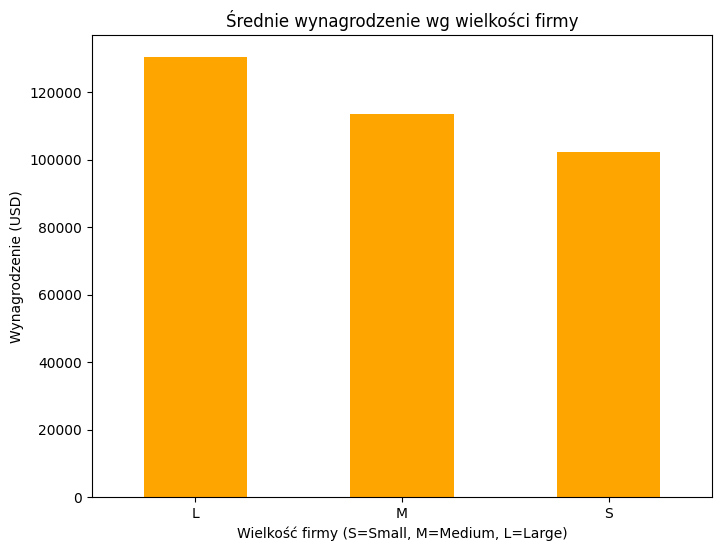

In [113]:
#Średnie wynagrodzenie wg wielkości firmy
mean_salary_size = df_cleaned.groupby('company_size')['salary_usd'].mean().sort_values(ascending=False)

plt.figure(figsize=(8, 6))
mean_salary_size.plot(kind='bar', color='orange')
plt.title('Średnie wynagrodzenie wg wielkości firmy')
plt.xlabel('Wielkość firmy (S=Small, M=Medium, L=Large)')
plt.ylabel('Wynagrodzenie (USD)')
plt.xticks(rotation=0)
plt.show()


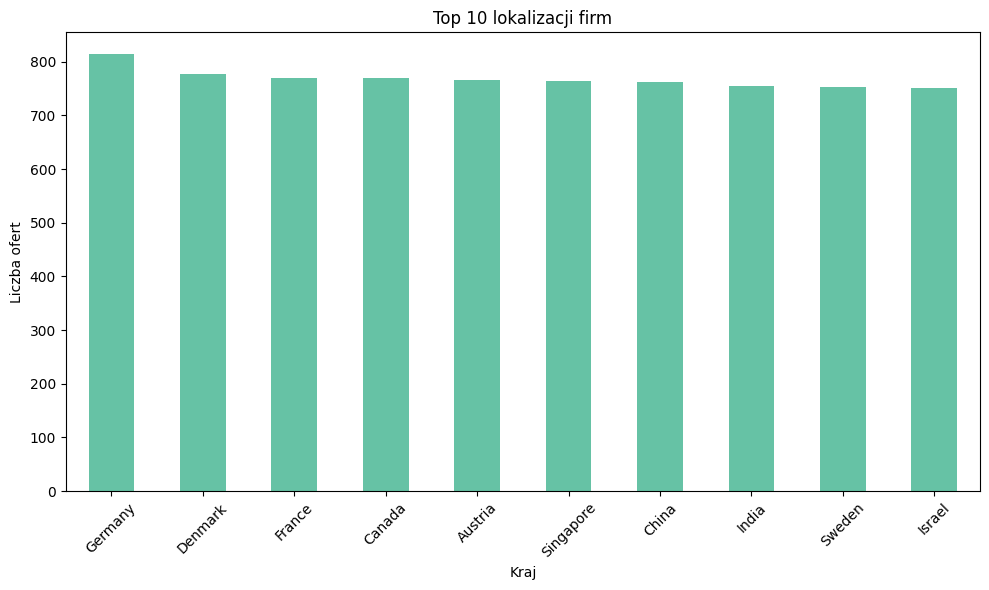

In [114]:
#Top 10 lokalizacji firm
plt.figure(figsize=(10, 6))
df_cleaned['company_location'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 lokalizacji firm')
plt.xlabel('Kraj')
plt.ylabel('Liczba ofert')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


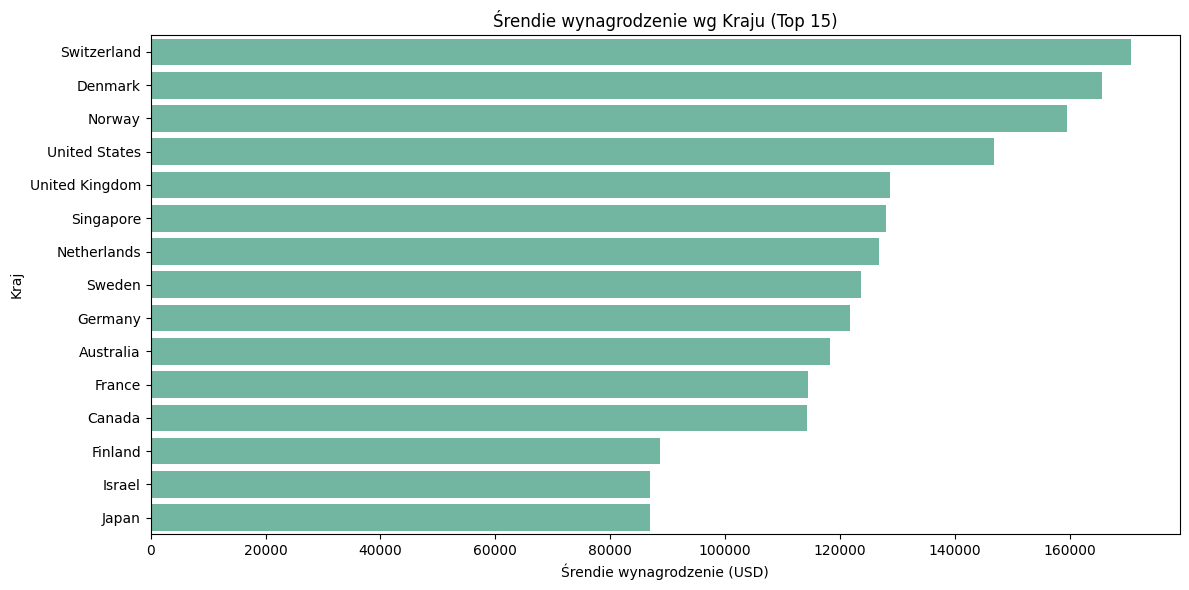

In [115]:
# Average salary per country (Top 15)
country_avg = df_cleaned.groupby("company_location")["salary_usd"].mean().sort_values(ascending=False).head(15)

plt.figure(figsize=(12, 6))
sns.barplot(x=country_avg.values, y=country_avg.index)
plt.title("Śrendie wynagrodzenie wg Kraju (Top 15)")
plt.xlabel("Śrendie wynagrodzenie (USD)")
plt.ylabel("Kraj")
plt.tight_layout()
plt.show()

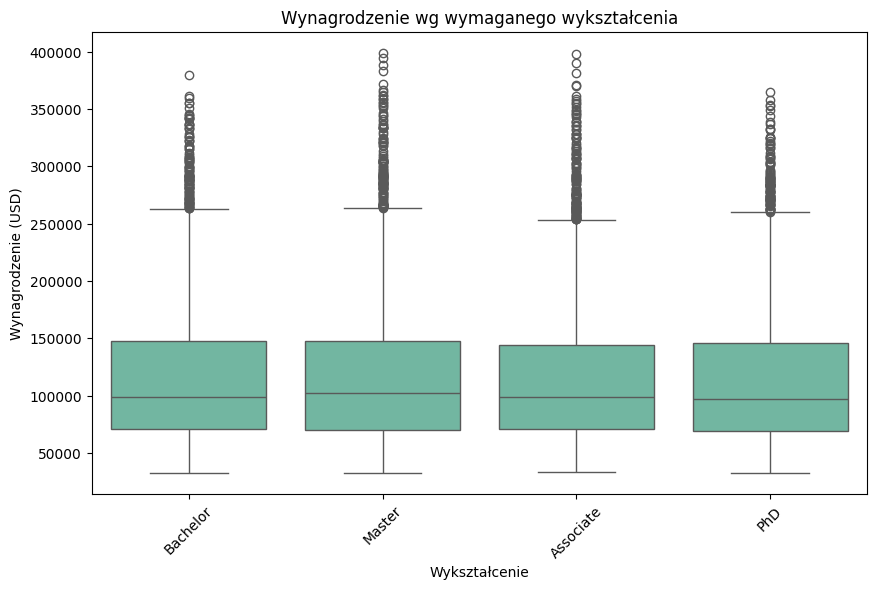

In [116]:
#Wynagrodzenie wg wykształcenia
plt.figure(figsize=(10, 6))
sns.boxplot(x='education_required', y='salary_usd', data=df_cleaned)
plt.title('Wynagrodzenie wg wymaganego wykształcenia')
plt.xlabel('Wykształcenie')
plt.ylabel('Wynagrodzenie (USD)')
plt.xticks(rotation=45)
plt.show()


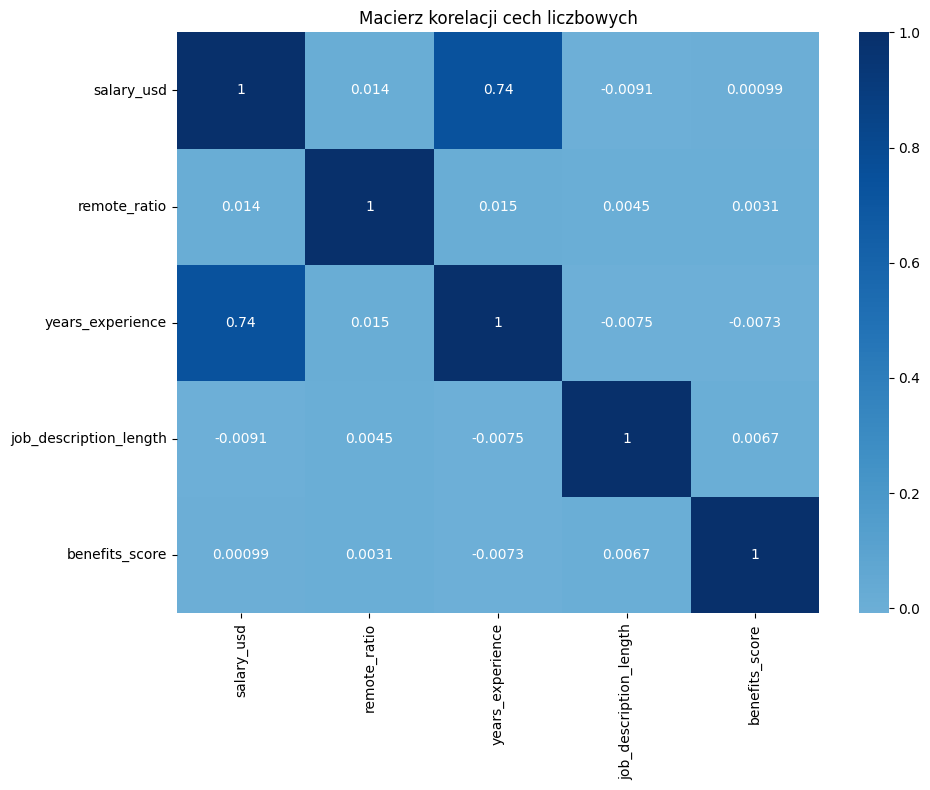

In [117]:
#Macierz korelacji cech liczbowych
plt.figure(figsize=(10, 8))
corr = df_cleaned.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='Blues', center=0)
plt.title('Macierz korelacji cech liczbowych')
plt.tight_layout()
plt.show()


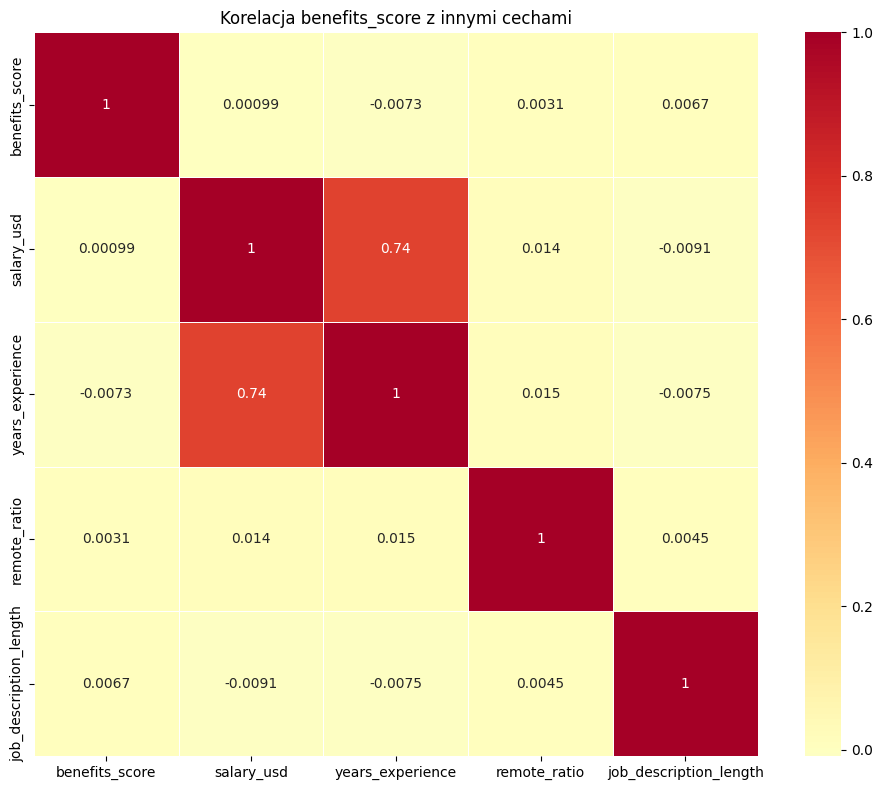

In [118]:
#Korelacja benefits_score z innymi cechami liczbowymi
numeric_cols = ['benefits_score', 'salary_usd', 'years_experience', 'remote_ratio', 'job_description_length']
correlation_matrix = df_cleaned[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            square=True, linewidths=0.5)
plt.title('Korelacja benefits_score z innymi cechami')
plt.tight_layout()
plt.show()


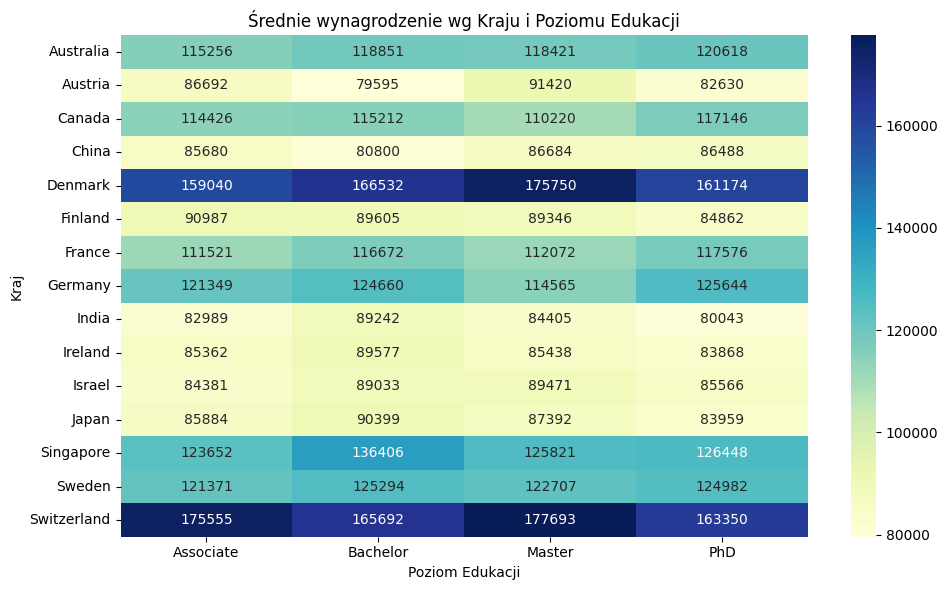

In [119]:
pivot = df_cleaned.pivot_table(
    values="salary_usd",
    index="company_location",
    columns="education_required",
    aggfunc="mean"
)

#Top 10 kraji 
top = df_cleaned["company_location"].value_counts().head(15).index
pivot = pivot.loc[pivot.index.isin(top)]

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title("Średnie wynagrodzenie wg Kraju i Poziomu Edukacji")
plt.xlabel("Poziom Edukacji")
plt.ylabel("Kraj")
plt.tight_layout()
plt.show()

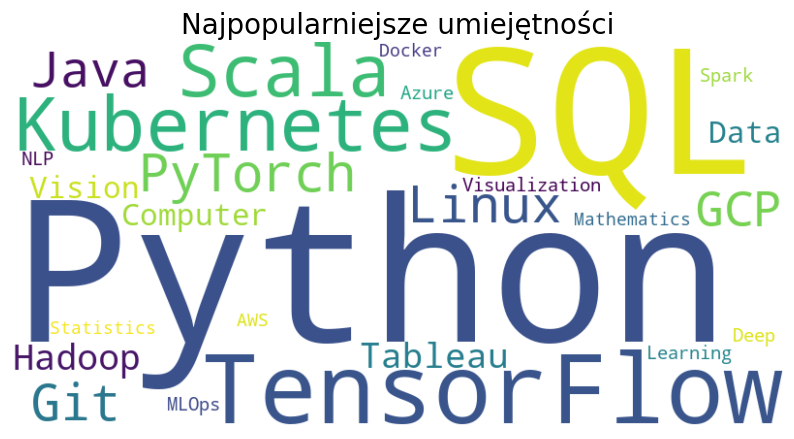

In [120]:
#wordcloud najczęstszych skilli
all_skills = ', '.join(df_cleaned['required_skills'].dropna())

wordcloud = WordCloud(width=800, height=400, 
                     background_color='white', 
                     collocations=False,
                     colormap='viridis',
                     max_words=100).generate(all_skills)

plt.figure(figsize=(10, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Najpopularniejsze umiejętności', fontsize=20)
plt.show()

In [121]:
# Funkcja do detekcji wartości odstających metodą IQR
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower = Q1 - 1.5 * IQR
    upper = Q3 + 1.5 * IQR
    return data[(data[column] < lower) | (data[column] > upper)]

# Detekcja outliers w wynagrodzeniu
outliers_salary = detect_outliers_iqr(df, 'salary_usd')
print(f"Liczba wartości odstających w salary_usd: {len(outliers_salary)}")
print(f"Procent outliers: {len(outliers_salary)/len(df)*100:.2f}%")

# Statystyki outliers
if len(outliers_salary) > 0:
    print(f"\nStatystyki outliers:")
    print(f"Min: ${outliers_salary['salary_usd'].min():,}")
    print(f"Max: ${outliers_salary['salary_usd'].max():,}")
    print(f"Średnia: ${outliers_salary['salary_usd'].mean():,.0f}")


Liczba wartości odstających w salary_usd: 483
Procent outliers: 3.22%

Statystyki outliers:
Min: $261,046
Max: $399,095
Średnia: $298,761


In [122]:
# Podsumowanie kluczowych statystyk
print("=== PODSUMOWANIE EDA ===")
print(f"Całkowita liczba ofert: {len(df_cleaned):,}")
print(f"Średnie wynagrodzenie: ${df_cleaned['salary_usd'].mean():,.0f}")
print(f"Mediana wynagrodzenia: ${df_cleaned['salary_usd'].median():,.0f}")
print(f"Zakres wynagrodzeń: ${df_cleaned['salary_usd'].min():,.0f} - ${df_cleaned['salary_usd'].max():,.0f}")
print(f"Najczęstszy poziom doświadczenia: {df_cleaned['experience_level_full'].mode()[0]}")
print(f"Najczęstszy typ zatrudnienia: {df_cleaned['employment_type_full'].mode()[0]}")
print(f"Procent pracy w pełni zdalnej: {(df_cleaned['remote_ratio'] == 100).mean()*100:.1f}%")
print(f"Średni wiek doświadczenia: {df_cleaned['years_experience'].mean():.1f} lat")


=== PODSUMOWANIE EDA ===
Całkowita liczba ofert: 15,000
Średnie wynagrodzenie: $115,349
Mediana wynagrodzenia: $99,705
Zakres wynagrodzeń: $32,519 - $399,095
Najczęstszy poziom doświadczenia: Mid
Najczęstszy typ zatrudnienia: Full-time
Procent pracy w pełni zdalnej: 32.8%
Średni wiek doświadczenia: 6.3 lat


### Wnioski z eksploracyjnej analizy danych

1. **Rozkład wynagrodzeń**: Zarobki w branży AI są dość zróżnicowane - większość ludzi zarabia między 70-150 tysięcy dolarów rocznie, ale są też osoby z pensją powyżej 300 tysięcy. Średnia wynosi około 115 tysięcy, ale połowa zarabia mniej niż 100 tysięcy, co wskazuje na dużą różnorodność stanowisk i poziomów zaawansowania w branży AI.
2. **Poziomy doświadczenia**: Rozkład poziomów doświadczenia jest bardzo równomierny - Mid (3,781), Executive (3,760), Senior (3,741), Entry (3,718). Wykres liniowy z odchyleniem standardowym pokazuje wyraźną progresję wynagrodzeń wraz ze wzrostem poziomu doświadczenia, co potwierdza logiczną strukturę rynku pracy AI. Średni wiek doświadczenia wynosi 6.3 lat.
3. **Typy zatrudnienia**: Dominują oferty pracy na pełen etat (Full-time: 3,812 ofert, 25.4%), następnie Freelance (3,758, 25.1%), Contract (3,721, 24.8%) i Part-time (3,709, 24.7%). Rozkład jest bardzo równomierny, co wskazuje na dużą elastyczność form zatrudnienia w branży AI i różnorodność modeli współpracy.
4. **Praca zdalna**: 32.8% ofert to praca w pełni zdalna, co pokazuje wysoki poziom akceptacji pracy zdalnej w branży AI. Średnie wynagrodzenia są podobne niezależnie od trybu pracy (stacjonarna, hybrydowa, zdalna), co sugeruje, że praca zdalna nie wpływa negatywnie na wynagrodzenie i jest traktowana równorzędnie.
5. **Różnice geograficzne**: Najwyższe średnie wynagrodzenia oferują Szwajcaria, Dania, Norwegia i USA (powyżej $140,000). Niemcy prowadzą pod względem liczby ofert (około 700), następnie Dania, Francja i Kanada. Widoczne są znaczące różnice geograficzne w wynagrodzeniach, co odzwierciedla różnice w kosztach życia, dojrzałości rynków technologicznych i lokalnej konkurencji o talenty AI.
6. **Wartości odstające**: Zidentyfikowano 483 wartości odstających (3.22% danych) w wynagrodzeniach, z przedziału $261,046 - $399,095 (średnia $298,761). Te wysokie wynagrodzenia prawdopodobnie dotyczą stanowisk executive, specjalistycznych ról w dużych firmach technologicznych lub pozycji w krajach o wysokich kosztach życia. Korelacje między zmiennymi liczbowymi są generalnie słabe (poza years_experience vs salary_usd), co sugeruje, że wynagrodzenie zależy od kombinacji wielu czynników jednocześnie.

### Trenowanie Modelu